In [32]:
import pandas as pd
import fbprophet as ph

Importing plotly failed. Interactive plots will not work.


In [2]:
predictor = pd.read_csv('./final_data-2.csv')

In [4]:
predictor.columns

Index(['country_region', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'Country', 'Population',
       'Pop. Density (per sq. mi.)', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'total_cases', 'total_cases_per_million',
       'new_cases_per_million', 'new_deaths_per_million', 'stringency_index',
       'population', 'population_density', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')

In [15]:
US_data = predictor.loc[predictor['country_region'] == 'United States', ]

In [16]:
US_data

country_region       date  \
1162  United States  2/15/2020   
1163  United States  2/16/2020   
1164  United States  2/17/2020   
1165  United States  2/18/2020   
1166  United States  2/19/2020   
...             ...        ...   
1323  United States  7/25/2020   
1324  United States  7/26/2020   
1325  United States  7/27/2020   
1326  United States  7/28/2020   
1327  United States  7/29/2020   

      retail_and_recreation_percent_change_from_baseline  \
1162                                                  6    
1163                                                  7    
1164                                                  6    
1165                                                  0    
1166                                                  2    
...                                                 ...    
1323                                                -19    
1324                                                -17    
1325                                                -14    
1326                                                -14    
1327                                                -13    

      grocery_and_pharmacy_percent_change_from_baseline  \
1162                                                  2   
1163                                                  1   
1164                                                  0   
1165                                                 -1   
1166                                                  0   
...                                                 ...   
1323                                                 -2   
1324                                                 -5   
1325                                                 -4   
1326                                                 -3   
1327                                                 -3   

      parks_percent_change_from_baseline  \
1162                                  15   
1163                                  16   
1164                                  28   
1165                                   6   
1166                                   8   
...                                  ...   
1323                                  77   
1324                                  65   
1325                                  48   
1326                                  53   
1327                                  56   

      transit_stations_percent_change_from_baseline  \
1162                                              3   
1163                                              2   
1164                                             -9   
1165                                              1   
1166                                              1   
...                                             ...   
1323                                            -21   
1324                                            -24   
1325                                            -32   
1326                                            -32   
1327                                            -31   

      workplaces_percent_change_from_baseline  \
1162                                        2   
1163                                        0   
1164                                      -24   
1165                                        0   
1166                                        1   
...                                       ...   
1323                                      -13   
1324                                      -16   
1325                                      -38   
1326                                      -38   
1327                                      -38   

      residential_percent_change_from_baseline        Country  Population  \
1162                                        -1  United States   298444215   
1163                                        -1  United States   298444215   
1164                                         5  United States   298444215   
1165                                         1  United States   298444215   
11

In [18]:
US_data = US_data.loc[:, ['date', 'hospital_beds_per_thousand','Birthrate','population_density','Agriculture','Service',
                      'Deathrate', 'Industry','retail_and_recreation_percent_change_from_baseline', 'new_cases_per_million',
                      'stringency_index','new_deaths_per_million']]

In [19]:
US_data

date  hospital_beds_per_thousand  Birthrate  population_density  \
1162  2/15/2020                        2.77      14.14              35.608   
1163  2/16/2020                        2.77      14.14              35.608   
1164  2/17/2020                        2.77      14.14              35.608   
1165  2/18/2020                        2.77      14.14              35.608   
1166  2/19/2020                        2.77      14.14              35.608   
...         ...                         ...        ...                 ...   
1323  7/25/2020                        2.77      14.14              35.608   
1324  7/26/2020                        2.77      14.14              35.608   
1325  7/27/2020                        2.77      14.14              35.608   
1326  7/28/2020                        2.77      14.14              35.608   
1327  7/29/2020                        2.77      14.14              35.608   

      Agriculture  Service  Deathrate  Industry  \
1162         0.01    0.787       8.26     0.204   
1163         0.01    0.787       8.26     0.204   
1164         0.01    0.787       8.26     0.204   
1165         0.01    0.787       8.26     0.204   
1166         0.01    0.787       8.26     0.204   
...           ...      ...        ...       ...   
1323         0.01    0.787       8.26     0.204   
1324         0.01    0.787       8.26     0.204   
1325         0.01    0.787       8.26     0.204   
1326         0.01    0.787       8.26     0.204   
1327         0.01    0.787       8.26     0.204   

      retail_and_recreation_percent_change_from_baseline  \
1162                                                  6    
1163                                                  7    
1164                                                  6    
1165                                                  0    
1166                                                  2    
...                                                 ...    
1323                                                -19    
1324                                                -17    
1325                                                -14    
1326                                                -14    
1327                                                -13    

      new_cases_per_million  stringency_index  new_deaths_per_million  
1162                  0.000              5.56                   0.000  
1163                  0.000              5.56                   0.000  
1164                  0.000              5.56                   0.000  
1165                  0.000              5.56                   0.000  
1166                  0.000              5.56                   0.000  
...                     ...               ...                     ...  
1323                236.938             68.98                   3.940  
1324                197.878             68.98                   2.761  
1325                169.162             68.98                   1.435  
1326                169.917             68.98                   3.251  
1327                186.506             68.98                   3.761  

[166 rows x 12 columns]

In [20]:
interval_1 = len(pd.date_range(start = '7/30/2020', end = '7/1/2021'))
interval_2 = len(pd.date_range(start = '7/30/2020', end = '7/1/2022'))
interval_5 = len(pd.date_range(start = '7/30/2020', end = '7/1/2025'))

In [49]:
col_names = US_data.columns
col_names = [col for col in col_names if col != 'date']

In [86]:
len(col_names)

11

In [69]:
predictions_1 = pd.DataFrame(columns=col_names)
predictions_2 = pd.DataFrame(columns=col_names)
predictions_5 = pd.DataFrame(columns=col_names)

In [80]:
def forecast_predictors(df, columns, f_interval, predictions_df, date, freq = 'D'):
    for col in columns:
        col_df = df[['date', col]]
        col_df_names = col_df.columns
        col_df.columns = ['ds', 'y']
        m = ph.Prophet()
        m.fit(col_df)
        future = m.make_future_dataframe(periods = f_interval, freq = freq)
        forecast = m.predict(future)
        future_predict = forecast[['ds', 'yhat']]
        future_predict.columns = col_df_names
        future_prediction = future_predict.loc[future_predict['date'] == date, :]
        predictions_df[col] = future_prediction[col]

#     return future_predict

In [81]:
forecast_predictors(US_data, col_names, interval_1, predictions_1, '2021-07-01')
forecast_predictors(US_data, col_names, interval_2, predictions_2, '2022-07-01')
forecast_predictors(US_data, col_names, interval_5, predictions_5, '2025-07-01')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [82]:
predictions_1

hospital_beds_per_thousand  Birthrate  population_density  Agriculture  \
502                        2.77      14.14              35.608         0.01   

     Service  Deathrate  Industry  \
502    0.787       8.26     0.204   

     retail_and_recreation_percent_change_from_baseline  \
502                                          84.638213    

     new_cases_per_million  stringency_index  new_deaths_per_million  
502            1219.388443         52.378784               -8.650716

In [85]:
predictions_1.to_csv('one_year_prediction.csv', )

In [84]:
predictions_5

hospital_beds_per_thousand  Birthrate  population_density  Agriculture  \
502                         NaN        NaN                 NaN          NaN   

     Service  Deathrate  Industry  \
502      NaN        NaN       NaN   

     retail_and_recreation_percent_change_from_baseline  \
502                                                NaN    

     new_cases_per_million  stringency_index  new_deaths_per_million  
502                    NaN               NaN                     NaN

In [89]:
predictions_interval_1 = pd.DataFrame(columns=col_names)

In [90]:
def forecast_intervals(df, columns, f_interval, predictions_df, freq = 'D'):
    for col in columns:
        col_df = df[['date', col]]
        col_df_names = col_df.columns
        col_df.columns = ['ds', 'y']
        m = ph.Prophet()
        m.fit(col_df)
        future = m.make_future_dataframe(periods = f_interval, freq = freq)
        forecast = m.predict(future)
        future_predict = forecast[['ds', 'yhat']]
        future_predict.columns = col_df_names
        predictions_df[col] = future_predict[col]

In [91]:
forecast_intervals(US_data, col_names, interval_1, predictions_interval_1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [94]:
predictions_interval_1

hospital_beds_per_thousand  Birthrate  population_density  Agriculture  \
0                          2.77      14.14              35.608         0.01   
1                          2.77      14.14              35.608         0.01   
2                          2.77      14.14              35.608         0.01   
3                          2.77      14.14              35.608         0.01   
4                          2.77      14.14              35.608         0.01   
..                          ...        ...                 ...          ...   
498                        2.77      14.14              35.608         0.01   
499                        2.77      14.14              35.608         0.01   
500                        2.77      14.14              35.608         0.01   
501                        2.77      14.14              35.608         0.01   
502                        2.77      14.14              35.608         0.01   

     Service  Deathrate  Industry  \
0      0.787       8.26     0.204   
1      0.787       8.26     0.204   
2      0.787       8.26     0.204   
3      0.787       8.26     0.204   
4      0.787       8.26     0.204   
..       ...        ...       ...   
498    0.787       8.26     0.204   
499    0.787       8.26     0.204   
500    0.787       8.26     0.204   
501    0.787       8.26     0.204   
502    0.787       8.26     0.204   

     retail_and_recreation_percent_change_from_baseline  \
0                                             5.363195    
1                                             4.828287    
2                                             7.247057    
3                                             7.242193    
4                                             7.310738    
..                                                 ...    
498                                          79.204596    
499                                          82.715713    
500                                          83.803195    
501                                          84.964087    
502                                          84.638213    

     new_cases_per_million  stringency_index  new_deaths_per_million  
0               -11.073994         -7.265071               -0.642810  
1               -13.381824         -5.614258               -1.067241  
2               -24.582482         -3.885378               -1.685577  
3               -23.313585         -2.443722               -1.426028  
4               -14.926418         -1.044544               -0.049099  
..                     ...               ...                     ...  
498            1213.052417         52.585398               -9.498400  
499            1203.176414         52.474134              -10.234460  
500            1205.769966         52.075647              -10.092636  
501            1215.481788         51.634680               -8.833430  
502            1219.388443         52.378784               -8.650716  

[503 rows x 11 columns]

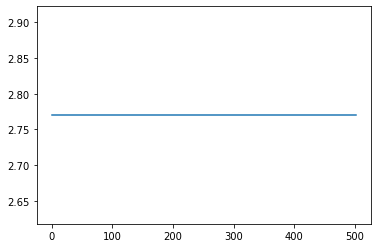

In [93]:
predictions_interval_1['hospital_beds_per_thousand'].plot()